In [1]:
%cd ..

/home/anatoly/Private/GitHub/renokan/study_ds/WeatherAUS-5


## Information about the class OutliersTrim

### 1. Importing the modules and setting parameters

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from weather_utils import OutliersTrim

### 2. Loading dataset

In [3]:
%ldir

drwxrwxr-x 3 anatoly    4096 авг  1 01:50 data/
drwxrwxr-x 3 anatoly    4096 авг  4 22:49 info/
drwxrwxr-x 2 anatoly    4096 авг  4 19:21 __pycache__/
drwxrwxr-x 3 anatoly    4096 авг  4 21:41 report/


In [4]:
%lf data/

-rw-rw-r-- 1 anatoly 12807959 июл 27 23:56 actual_data.csv
-rw-rw-r-- 1 anatoly  2793277 июл 27 23:56 future_data.csv
-rw-rw-r-- 1 anatoly    35935 авг  1 01:50 split_dataset.ipynb
-rw-rw-r-- 1 anatoly 14094055 дек 11  2020 weatherAUS.csv


In [5]:
df = pd.read_csv('data/actual_data.csv')

In [6]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118898,2015-12-27,Uluru,20.5,34.7,0.0,NaN,NaN,E,52.0,ESE,...,23.0,12.0,1013.2,1010.1,NaN,NaN,24.3,33.0,No,No
118899,2015-12-28,Uluru,18.0,36.4,0.0,NaN,NaN,ESE,54.0,E,...,17.0,7.0,1014.7,1010.9,NaN,NaN,26.7,35.0,No,No
118900,2015-12-29,Uluru,17.5,37.1,0.0,NaN,NaN,E,56.0,E,...,12.0,7.0,1012.6,1007.5,NaN,NaN,28.1,34.7,No,No
118901,2015-12-30,Uluru,20.0,38.9,0.0,NaN,NaN,E,59.0,E,...,12.0,12.0,1007.2,1002.6,NaN,1.0,31.3,38.4,No,No


In [7]:
select_columns = ['MaxTemp', 'Temp3pm', 'WindGustSpeed']
raw_data = df[select_columns].copy()
raw_data.dropna(inplace=True)

check_column = 'Temp3pm'

In [8]:
def show_result(column_name, origin_data, new_data=None):
    list_data = [origin_data]

    if isinstance(new_data, pd.DataFrame):
        list_data.append(new_data)
        
    for data in list_data:
        fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(14,5),
                                          gridspec_kw={"height_ratios": (.2, .8)}
                                         )

        sns.boxplot(data=data, x=column_name, ax=ax_box)
        sns.histplot(data=data, x=column_name, ax=ax_hist, bins=100)

        ax_box.set(xlabel='')
        plt.show()

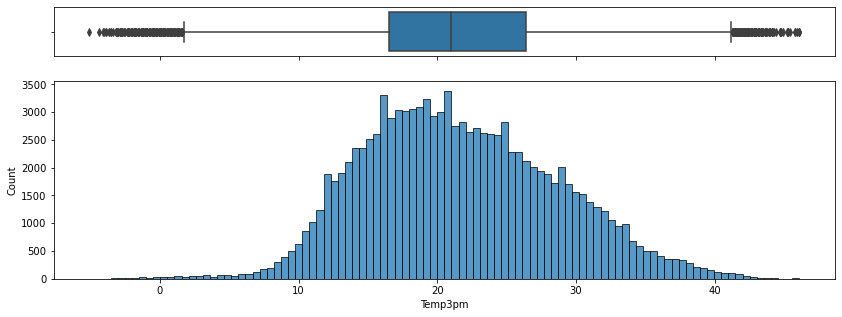

In [9]:
show_result(check_column, raw_data)

### Strategy = median

In [10]:
outlier_median = OutliersTrim(strategy='median')

In [11]:
outlier_median.fit(raw_data)

OutliersTrim(strategy='median')

In [12]:
outlier_median.get_params()

{'method_search': 'smart', 'strategy': 'median'}

In [13]:
outlier_median._otliers_dict

{'MaxTemp': (1.7846924474079202, 44.47307065874882, 22.6),
 'Temp3pm': (0.6903528692254177, 42.56273015243744, 21.0),
 'WindGustSpeed': (5.5, 73.5, 39.0)}

In [14]:
median_data = outlier_median.transform(raw_data)

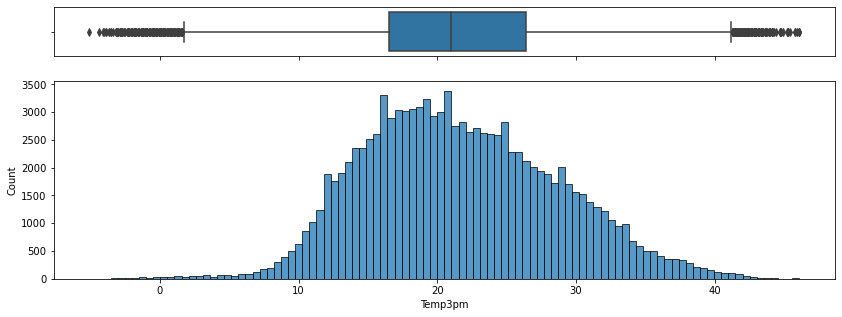

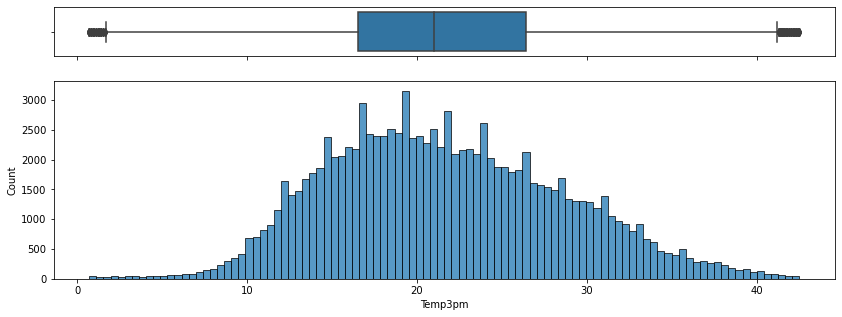

In [15]:
show_result(check_column, raw_data, median_data)

### Strategy = border

In [16]:
outlier_border = OutliersTrim(strategy='border')

In [17]:
outlier_border.fit(raw_data)

OutliersTrim(strategy='border')

In [18]:
outlier_border.get_params()

{'method_search': 'smart', 'strategy': 'border'}

In [19]:
outlier_border._otliers_dict

{'MaxTemp': (1.7846924474079202, 44.47307065874882, None),
 'Temp3pm': (0.6903528692254177, 42.56273015243744, None),
 'WindGustSpeed': (5.5, 73.5, None)}

In [20]:
border_data = outlier_border.transform(raw_data)

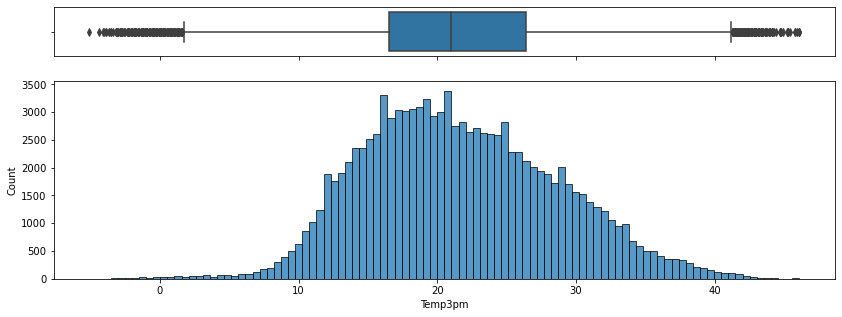

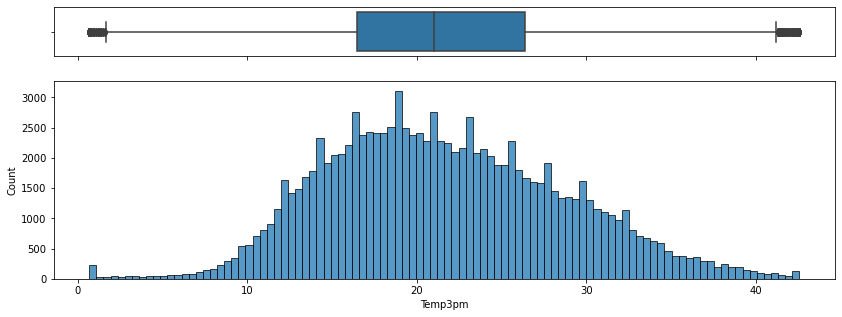

In [21]:
show_result(check_column, raw_data, border_data)

### Strategy = unique

In [22]:
outlier_unique = OutliersTrim(strategy='unique')

In [23]:
outlier_unique.fit(raw_data)

OutliersTrim(strategy='unique')

In [24]:
outlier_border.get_params()

{'method_search': 'smart', 'strategy': 'border'}

In [25]:
outlier_unique._otliers_dict

{'MaxTemp': (1.7846924474079202, 44.47307065874882, 9999),
 'Temp3pm': (0.6903528692254177, 42.56273015243744, 9999),
 'WindGustSpeed': (5.5, 73.5, 9999)}

In [26]:
unique_data = outlier_unique.transform(raw_data)

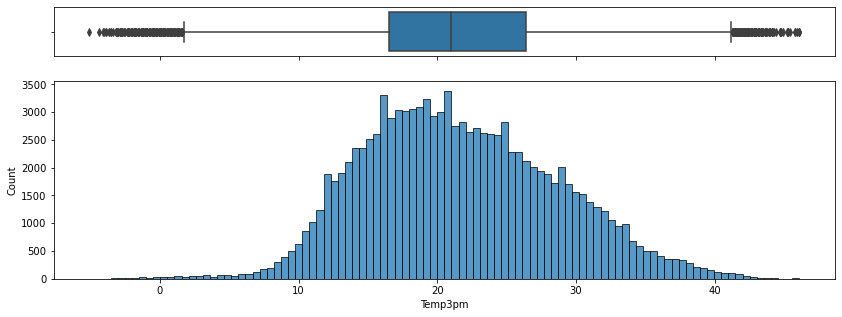

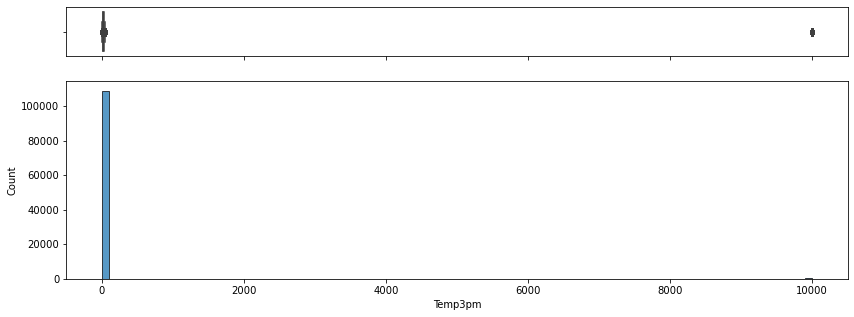

In [27]:
show_result(check_column, raw_data, unique_data)

### Strategy = mode / most_frequent

In [28]:
outlier_mode = OutliersTrim(strategy='most_frequent')

In [29]:
outlier_mode.fit(raw_data)

OutliersTrim(strategy='most_frequent')

In [30]:
outlier_mode.get_params()

{'method_search': 'smart', 'strategy': 'most_frequent'}

In [31]:
outlier_mode._otliers_dict

{'MaxTemp': (1.7846924474079202, 44.47307065874882, 19.9),
 'Temp3pm': (0.6903528692254177, 42.56273015243744, 18.4),
 'WindGustSpeed': (5.5, 73.5, 35.0)}

In [32]:
mode_data = outlier_mode.transform(raw_data)

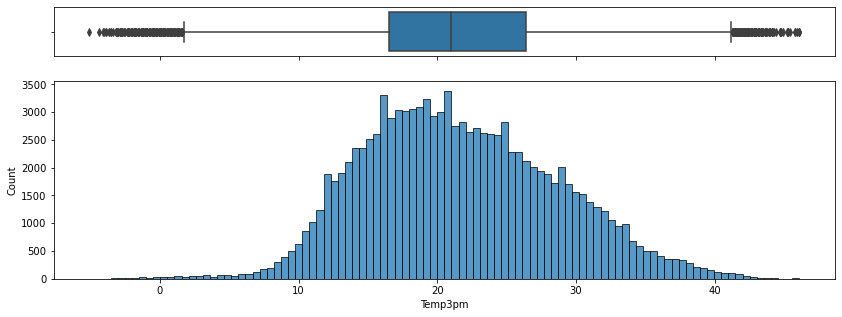

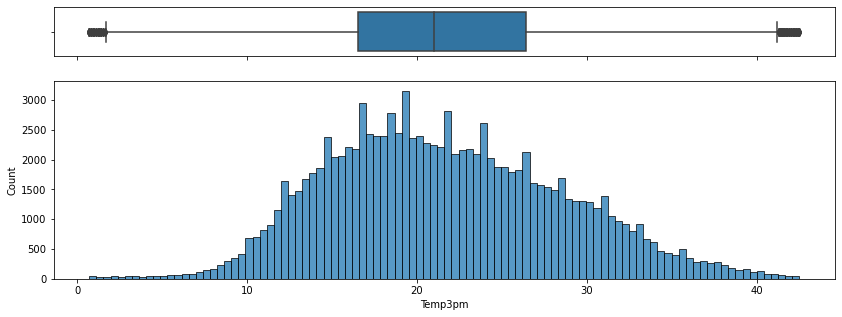

In [33]:
show_result(check_column, raw_data, mode_data)